In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip -qq '/content/drive/MyDrive/Study/2024-S/Outpainting/Dataset/new_eval_mask.zip' -d '/content/'

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('/content/100_im.png')
mask = cv2.imread('/content/mask_99.png', cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (256, 256))
img_masked = cv2.bitwise_and(img_resized, img_resized, mask=mask)
img_masked_white_bg = np.where(mask[:,:,np.newaxis] == 0, 255, img_masked)

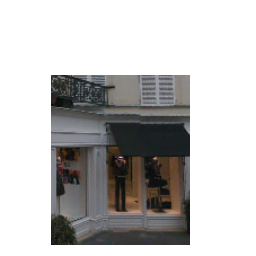

In [ ]:
cv2_imshow(img_masked_white_bg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
import cv2
import numpy as np
import os

def process_images(input_dir, mask_dir, output_dir, image_size=(256, 256)):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Get list of image files and mask files
    image_files = [f for f in os.listdir(input_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    mask_files = [f for f in os.listdir(mask_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    for image_file, mask_file in zip(image_files, mask_files):
        # Read the image and mask
        img_path = os.path.join(input_dir, image_file)
        mask_path = os.path.join(mask_dir, mask_file)

        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Resize image and mask
        img_resized = cv2.resize(img, image_size)
        mask_resized = cv2.resize(mask, image_size)

        # Invert the mask
        mask_inverted = cv2.bitwise_not(mask_resized)

        # Apply the inverted mask to create a white background where the mask is 0
        img_masked = cv2.bitwise_and(img_resized, img_resized, mask=mask_inverted)
        img_masked_white_bg = np.where(mask_resized[:, :, np.newaxis] == 255, 255, img_masked)

        # Save the masked image to the output directory
        output_path = os.path.join(output_dir, image_file)
        cv2.imwrite(output_path, img_masked_white_bg)

        print(f'Processed {image_file} and saved to {output_path}')
# Directories
input_dir = '/content/drive/MyDrive/Study/2024-S/Outpainting/Dataset/Paris_StreetView_Dataset/paris_eval_gt'
mask_dir = '/content/new_eval_mask/l'
output_dir = '/content/new_masked_img/l'

# Process all images
process_images(input_dir, mask_dir, output_dir)


Processed 096_im.png and saved to /content/new_masked_img/l/096_im.png
Processed 098_im.png and saved to /content/new_masked_img/l/098_im.png
Processed 099_im.png and saved to /content/new_masked_img/l/099_im.png
Processed 097_im.png and saved to /content/new_masked_img/l/097_im.png
Processed 100_im.png and saved to /content/new_masked_img/l/100_im.png
Processed 095_im.png and saved to /content/new_masked_img/l/095_im.png
Processed 067_im.png and saved to /content/new_masked_img/l/067_im.png
Processed 082_im.png and saved to /content/new_masked_img/l/082_im.png
Processed 086_im.png and saved to /content/new_masked_img/l/086_im.png
Processed 075_im.png and saved to /content/new_masked_img/l/075_im.png
Processed 057_im.png and saved to /content/new_masked_img/l/057_im.png
Processed 091_im.png and saved to /content/new_masked_img/l/091_im.png
Processed 061_im.png and saved to /content/new_masked_img/l/061_im.png
Processed 081_im.png and saved to /content/new_masked_img/l/081_im.png
Proces

In [21]:
!zip -r /content/drive/MyDrive/new_eval_masked_img.zip /content/new_masked_img

  adding: content/new_masked_img/ (stored 0%)
  adding: content/new_masked_img/s/ (stored 0%)
  adding: content/new_masked_img/s/078_im.png (deflated 2%)
  adding: content/new_masked_img/s/013_im.png (deflated 1%)
  adding: content/new_masked_img/s/035_im.png (deflated 1%)
  adding: content/new_masked_img/s/017_im.png (deflated 1%)
  adding: content/new_masked_img/s/069_im.png (deflated 1%)
  adding: content/new_masked_img/s/063_im.png (deflated 1%)
  adding: content/new_masked_img/s/030_im.png (deflated 1%)
  adding: content/new_masked_img/s/060_im.png (deflated 1%)
  adding: content/new_masked_img/s/094_im.png (deflated 1%)
  adding: content/new_masked_img/s/038_im.png (deflated 1%)
  adding: content/new_masked_img/s/025_im.png (deflated 1%)
  adding: content/new_masked_img/s/010_im.png (deflated 1%)
  adding: content/new_masked_img/s/091_im.png (deflated 2%)
  adding: content/new_masked_img/s/027_im.png (deflated 1%)
  adding: content/new_masked_img/s/050_im.png (deflated 1%)
  addi